# *eHeart* Gets New Office

1. [Introduction](#Introduction)
2. [Data and Methodology](#Data&Methodology)
3. [Results and Discussion](#Results&Discussion)
4. [Conclusion](#Conclusion)


## Introduction <a id='Introduction'></a>

The wearable technology market is expected to grow at highest rate, especially since COVID-19, and the number of connected wearable devices worldwide is increasing continuously, as the following figure shows.

<a href="https://www.statista.com/statistics/490231/wearable-devices-worldwide-by-region/" rel="nofollow"><img src="https://www.statista.com/graphic/1/490231/wearable-devices-worldwide-by-region.jpg" alt="Statistic: Number of connected wearable devices worldwide by region from 2015 to 2022 (in millions) | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br /> Worldwide wearable device by <a href="https://www.statista.com" rel="nofollow">Statista</a>

**eHeart**, a (hypothetical) wearable device company has recently decided to expand its market from Europe to North America with the a new office in either New York or Toronto, both of them are financial capitals of their respective countries.

Because of the dversity of employees, **eHeart** aims to select a city which reflects the company's multi-ethinicity and diversity in cultural background. Moreover, being a company developing wearable device and aiming to improve the quality of the life, the new office should provide a healthy environment for the employees.

## Data and Methodology <a id='Data&Methodology'></a>

First of all, New York and Toronto are compared with each other in terms of cultural diversity and the percentage of the public green space. the following data will be used:

- [New York ethnic diversity](https://en.wikipedia.org/wiki/Demographics_of_New_York_City#Diversity_of_New_York_City's_boroughs) for the data of New York diversity

- [Toronto ethinic diversity](https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) for the data of Toronto ethic diversity

- [Cities green parks](http://www.worldcitiescultureforum.com/data/of-public-green-space-parks-and-gardens) for the data of the percentage of green parks in different cities

The cadidate city with be selected based on the percentage of minority ethnics, as indicator of popularation diversity, and the percentage of public green space.

Once the city has been chosen, the next step will be selecting the a neighborhood which can provide a healthy lifestyle. For this purpose the selected city's neiborhood data ([New York neighborhoods](https://cocl.us/new_york_dataset) or [Toronto neiborhood](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M), depending on the selected city) will be combined with data from [Foursquare](https://www.foursquare.com)’s explore API with a focus on venues such as coffee and pub, for the afterwork events, and fitness facilities, which can also provide a great testing environment for **eHeart** device and algorithms.

A primary analysis will be carried out to analysis which neighborhood has most number of facilities. Then a K-mean cluster with be carried out in order to identify area where there is a higher density of those facility as potential area where to open the new office.

Finally a possible location for **eHeart**'s new office will be proposed.

In [1]:
import numpy as np

import pandas as pd

from itertools import chain 

import json

import io

import os

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

CLIENT_ID = "C0L02DBHNGH4CCFUDXFBUN4PNZQVOL2UV5OIIOZT5E4QUZ5N"
CLIENT_SECRET = "QKGODVDREVSW0JRC50WKWILASWD5Q5O2UTPDXO2ASSU1HYKX"
VERSION = "20200707"
LIMIT = 50
foursquare_api_str = "https://api.foursquare.com/v2/%s/%s?client_id={}&client_secret={}&v={}".format(
    CLIENT_ID, CLIENT_SECRET, VERSION
)

# New York vs Toronto

First of all, New York and Toronto are compared with each other in terms of cultural diversity and the percentage of the public green space. the following data will be used:

- [New York ethnic diversity](https://en.wikipedia.org/wiki/Demographics_of_New_York_City#Diversity_of_New_York_City's_boroughs) for the data of New York diversity

- [Toronto ethinic diversity](https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) for the data of Toronto ethic diversity

- [Cities green parks](http://www.worldcitiescultureforum.com/data/of-public-green-space-parks-and-gardens) for the data of the percentage of green parks in different cities

          green area %  minor ethnics %
New York          27.0             57.3
Toronto           13.0             52.2


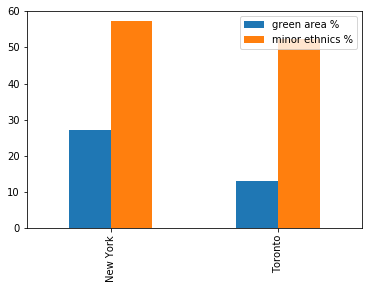

In [2]:
# New York ethnic diversity
df_newyork_wiki = pd.read_html(
    "https://en.wikipedia.org/wiki/Demographics_of_New_York_City#Diversity_of_New_York_City's_boroughs", 
    header=1)[3]
df_newyork = pd.DataFrame(
    {'percentage': [float(s[:-1]) for s in list(df_newyork_wiki['Unnamed: 2'])]},
    index= list(df_newyork_wiki['Unnamed: 0'])
)
# df_newyork.plot.pie(y='percentage', figsize=(5,5), title = 'New York', legend=False)

# Toronto ethic_diversity
df_toronto_wiki = pd.read_html(
    "https://en.m.wikipedia.org/wiki/Demographics_of_Toronto"
)[16]  # there is a merged cell at the beginning
df_toronto = pd.DataFrame(
    {'percentage': [float(df_toronto_wiki.loc[1,3])]+[float(v) for v in list(df_toronto_wiki.loc[2:13, 2])]},
    index= [df_toronto_wiki.loc[1,1]]+list(df_toronto_wiki.loc[2:13, 0])
)
# df_toronto.plot.pie(y='percentage', figsize=(5,5), title = 'Toronto', legend=False)

# green public park data
s=requests.get("https://raw.githubusercontent.com/yingji/coursera/master/public_green_space.csv").content
df_green_s = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=',')
df_green = pd.DataFrame(
    {'percentage': [float(s[:-1]) for s in list(df_green_s['Figure'])]},
    index= list(df_green_s['City'])
)

# city criterion
df_cities = pd.DataFrame(
    {'minor ethnics %': [100-df_newyork['percentage']['White'], 100-df_toronto['percentage']['White']],
     'green area %': [df_green['percentage']['New York'], df_green['percentage']['Toronto']]},
    index= ['New York', 'Toronto']
)
print(df_cities)
df_cities.plot(kind='bar')

## New York Neighborhood analysis

Since New York is the city with higher ethnic population and higher percentage of public green park, it is the best candidate for the **eHeart** new office.

Once the city has been chosen, the next step will be selecting the a neighborhood which can provide a healthy lifestyle. For this purpose the selected city's neiborhood data ([New York neighborhoods](https://cocl.us/new_york_dataset)) will be combined with data from Foursquare’s explore API with a focus on venues such as coffee and pub (for social interation and afterwork events) and fitness facilities.

N.B. Fitness facility can also provide a great testing environment for **eHeart** device and algorithms.

In [2]:
# New York neighbourhood data

address = 'New York, NY'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format('New York', latitude, longitude))

newyork_data=requests.get("https://cocl.us/new_york_dataset").json()
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

The geograpical coordinate of New York are 40.7127281, -74.0060152.


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [3]:
def getNearbyVenues(names, latitudes, longitudes, query, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}' \
            '&ll={},{}&radius={}&limit={}&query={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                query
            )
            
        # make the GET request
        response = requests.get(url).json()["response"]
        results = response['groups'][0]['items'] if 'groups' in response.keys() else []
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [4]:
venues_coffee_pubs = getNearbyVenues(
    names=neighborhoods['Neighborhood'],
    latitudes=neighborhoods['Latitude'],
    longitudes=neighborhoods['Longitude'],
    query='pub or coffee'
)
print('Coffee and pub', venues_coffee_pubs.head())

Coffee and pub   Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Kingsbridge              40.881687              -73.902818   
1  Kingsbridge              40.881687              -73.902818   
2  Marble Hill              40.876551              -73.910660   
3     Woodlawn              40.898273              -73.867315   
4     Woodlawn              40.898273              -73.867315   

                          Venue  Venue Latitude  Venue Longitude  
0       Mon Amour Coffee & Wine       40.885009       -73.900332  
1  Medio Restaurant Coffee Shop       40.880832       -73.908419  
2                   Coffee Cart       40.874555       -73.910358  
3                   Behan's Pub       40.898585       -73.867507  
4   John Mulligans Fireside Pub       40.897776       -73.867160  


In [5]:
venues_fitness = getNearbyVenues(
    names=neighborhoods['Neighborhood'],
    latitudes=neighborhoods['Latitude'],
    longitudes=neighborhoods['Longitude'],
    query='fitness'
)
print('fitness', venues_fitness.head())

fitness   Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Riverdale              40.890834              -73.912585   
1  Kingsbridge              40.881687              -73.902818   
2  Kingsbridge              40.881687              -73.902818   
3  Kingsbridge              40.881687              -73.902818   
4  Kingsbridge              40.881687              -73.902818   

                                           Venue  Venue Latitude  \
0                           Hayden On Hudson Gym       40.889593   
1                          Uptown Sports Complex       40.880271   
2                                    Build N Box       40.879847   
3                                24 Hour Fitness       40.880592   
4  3210 Riverdale Avenue - Wellness Center & Gym       40.882746   

   Venue Longitude  
0       -73.917446  
1       -73.903164  
2       -73.904302  
3       -73.908255  
4       -73.907625  


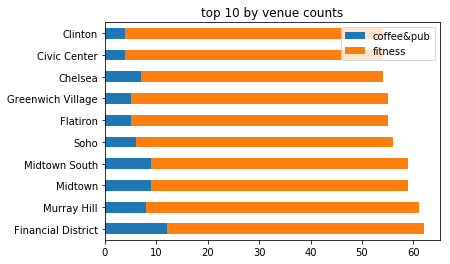

In [3]:
all_venues = venues_coffee_pubs.append(venues_fitness)
all_venues.insert(0, 'category', 
                  ['coffee&pub' for _ in range(len(venues_coffee_pubs))] + ['fitness' for _ in range(len(venues_fitness))])

# #saving
# current_folder = os.path.abspath(os.getcwd())
# print(current_folder)
# all_venues.to_pickle(os.path.join(current_folder, 'all_venue.pickle'))

# # loading
# current_folder = os.path.abspath(os.getcwd())
# all_venues = pd.read_pickle(os.path.join(current_folder, 'all_venue.pickle'))
# all_venues.head()

# venue_counts = all_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending=False)
neighborhood_names = np.unique(neighborhoods['Neighborhood'])
venue_counts = pd.DataFrame(
    {'coffee&pub': [np.sum(np.logical_and(all_venues['Neighborhood']==p, all_venues['category']=='coffee&pub')) 
                    for p in neighborhood_names],
     'fitness': [np.sum(np.logical_and(all_venues['Neighborhood']==p, all_venues['category']=='fitness')) 
                for p in neighborhood_names],
     'total': [np.sum(all_venues['Neighborhood']==p) for p in neighborhood_names]},
    index = neighborhood_names
).sort_values(by='total', ascending=False)
venue_counts[:10].plot(kind='barh', y=['coffee&pub', 'fitness'], stacked=True, title='top 10 by venue counts')

## K-means clustering of the venues and mapping

In order to find area where there is a high concentration of forementioned facilities, K-means cluster will be applied. The centroids of the obtained clusters will be mapped along with the position of the facilieties associated with the most popular cluster.

In [4]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_venues[['Venue Latitude', 'Venue Longitude']])
all_venues.insert(0, 'Cluster Labels', kmeans.labels_)
print(all_venues.head(10))

   Cluster Labels    Neighborhood  Neighborhood Latitude  \
0               4     Kingsbridge              40.881687   
1               4     Kingsbridge              40.881687   
2               4     Marble Hill              40.876551   
3               4        Woodlawn              40.898273   
4               4        Woodlawn              40.898273   
5               4         Norwood              40.877224   
6               4         Norwood              40.877224   
7               4  Pelham Parkway              40.857413   
8               4     City Island              40.847247   
9               4    Bedford Park              40.870185   

   Neighborhood Longitude                          Venue  Venue Latitude  \
0              -73.902818        Mon Amour Coffee & Wine       40.885009   
1              -73.902818   Medio Restaurant Coffee Shop       40.880832   
2              -73.910660                    Coffee Cart       40.874555   
3              -73.867315          

In [5]:
def get_closest_neighborhood(lat, long):
    distance = (neighborhoods['Latitude']-lat)**2 + (neighborhoods['Longitude']-long)**2
    closest_neighborhood = neighborhoods['Neighborhood'][np.argmin(distance)]
    return closest_neighborhood
centroids = pd.DataFrame({
    'Latitude': [v[0] for v in kmeans.cluster_centers_],
    'Longitude': [v[1] for v in kmeans.cluster_centers_],
    'closest neighborhood': [get_closest_neighborhood(v[0], v[1]) for v in kmeans.cluster_centers_],
    'counts': [np.sum(all_venues['Cluster Labels']==cont) for cont in range(5)]
})
print('venue centroids\n', centroids)

venue centroids
     Latitude  Longitude closest neighborhood  counts
0  40.598170 -74.104708            Todt Hill     100
1  40.722770 -73.824412    Kew Gardens Hills     171
2  40.760069 -73.971573         Sutton Place     981
3  40.702675 -73.986207                Dumbo     938
4  40.854760 -73.887657              Belmont     130


In [11]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers of the venues to the map
for lat, lon, poi, cluster in zip(all_venues['Venue Latitude'], 
                                  all_venues['Venue Longitude'], 
                                  all_venues['Neighborhood'], 
                                  all_venues['Cluster Labels']):
    if cluster==np.argmax(centroids['counts']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_clusters)

# add markers of the centroids to the map
for lat, lon, poi in zip(centroids['Latitude'], 
                         centroids['Longitude'], 
                         centroids['closest neighborhood']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='r',
        fill=True,
        fill_color='r',
        fill_opacity=1
    ).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a id='Results&Discussion'></a>

As result shows, New York is the city with higher ethnic population and higher percentage of public green park, it is the best candidate for the **eHeart** new office. Furthermore, many neighborhoods in Manhattan, such as Financial District, Murray Hill and Midtown, are also areas with higher number of coffee/pub and fitness facilities, which are essential to provide a healthy lifestyle, both physically and socially, to **eHeart**'s employees. In fact, the analysis carried out with K-mean also suggest an area within Manhattan. The suggested area has also the advantage of being close to Central Park.

## Conclusion <a id='Conclusion'></a>

New York is a has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. As such, it will be a great candidate for the location of **eHeart**'s new office. Furthermore, a possible location would be in the area close to Central Park, where there are a contratration of facilities, both for social events and for employees' wellbeing. 
<img src="https://raw.githubusercontent.com/yingji/coursera/master/ny_cluster.png">